# Unsupervised Learning with Python, Part 2
# --------------------------------------------------------------

# Dimensionality Reduction with PCA

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
from sklearn import datasets

### Wine Dataset

In [3]:
wine = datasets.load_wine()

In [4]:
wine.feature_names

['alcohol',
 'malic_acid',
 'ash',
 'alcalinity_of_ash',
 'magnesium',
 'total_phenols',
 'flavanoids',
 'nonflavanoid_phenols',
 'proanthocyanins',
 'color_intensity',
 'hue',
 'od280/od315_of_diluted_wines',
 'proline']

In [5]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [6]:
data = wine.data

In [8]:
data.shape

(178, 13)

In [9]:
samples = data[:, [5, 11]]

In [11]:
samples.shape

(178, 2)

In [12]:
samples

array([[2.8 , 3.92],
       [2.65, 3.4 ],
       [2.8 , 3.17],
       [3.85, 3.45],
       [2.8 , 2.93],
       [3.27, 2.85],
       [2.5 , 3.58],
       [2.6 , 3.58],
       [2.8 , 2.85],
       [2.98, 3.55],
       [2.95, 3.17],
       [2.2 , 2.82],
       [2.6 , 2.9 ],
       [3.1 , 2.73],
       [3.3 , 3.  ],
       [2.85, 2.88],
       [2.8 , 2.65],
       [2.95, 2.57],
       [3.3 , 2.82],
       [2.7 , 3.36],
       [3.  , 3.71],
       [2.41, 3.52],
       [2.61, 4.  ],
       [2.48, 3.63],
       [2.53, 3.82],
       [2.63, 3.2 ],
       [2.85, 3.22],
       [2.4 , 2.77],
       [2.95, 3.4 ],
       [2.65, 3.59],
       [3.  , 2.71],
       [2.86, 2.88],
       [2.42, 2.87],
       [2.95, 3.  ],
       [2.35, 2.87],
       [2.7 , 3.47],
       [2.6 , 2.78],
       [2.45, 2.51],
       [2.4 , 2.69],
       [3.  , 3.53],
       [3.15, 3.38],
       [2.45, 3.  ],
       [3.25, 3.56],
       [2.64, 3.  ],
       [3.  , 3.35],
       [2.85, 3.33],
       [3.25, 3.44],
       [3.1 ,

### Step 1: decorrelating data 

In [13]:
from sklearn.decomposition import PCA
model = PCA()
model.fit(samples)

PCA()

In [14]:
transformed = model.transform(samples)

In [25]:
print(transformed)

[[-1.32771994e+00  4.51396070e-01]
 [-8.32496068e-01  2.33099664e-01]
 [-7.52168680e-01 -2.94789161e-02]
 [-1.64026613e+00 -6.55724013e-01]
 [-5.67992278e-01 -1.83358911e-01]
 [-8.07948468e-01 -5.95331030e-01]
 [-8.74453372e-01  4.63619912e-01]
 [-9.38570037e-01  3.86879744e-01]
 [-5.06600144e-01 -2.34652243e-01]
 [-1.15919131e+00  7.60321086e-02]
 [-8.48343677e-01 -1.44589167e-01]
 [-9.88781053e-02  2.06553762e-01]
 [-4.16736898e-01 -4.91135760e-02]
 [-6.06861937e-01 -5.41812743e-01]
 [-9.42293719e-01 -5.22178083e-01]
 [-5.61680527e-01 -2.53787328e-01]
 [-3.53119809e-01 -3.62885573e-01]
 [-3.87902672e-01 -5.29289156e-01]
 [-8.04161418e-01 -6.37588080e-01]
 [-8.33858333e-01  1.69082914e-01]
 [-1.29479891e+00  1.63270739e-01]
 [-7.70704274e-01  4.94216064e-01]
 [-1.26729041e+00  6.48495720e-01]
 [-9.00000123e-01  5.11026278e-01]
 [-1.07786477e+00  5.94477857e-01]
 [-6.66192400e-01  1.20214368e-01]
 [-8.22597096e-01 -3.57906674e-02]
 [-1.88741351e-01  2.10150947e-02]
 [-1.02484606e+00  2

In [22]:
transformed.mean()

-1.995906561123877e-17

#### Principal Components:

In [16]:
model.components_

array([[-0.64116665, -0.76740167],
       [-0.76740167,  0.64116665]])

#### Plotting the samples and transformed samples

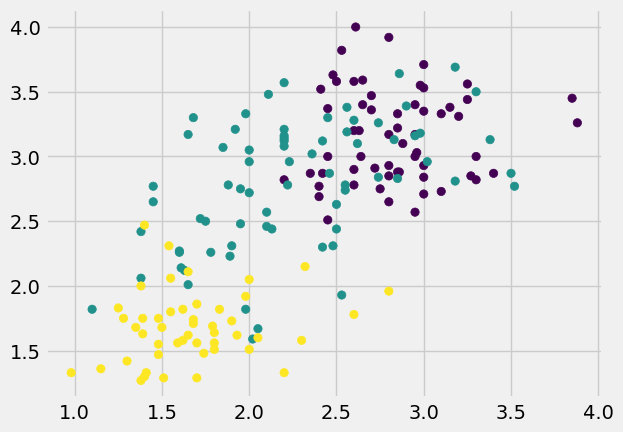

In [20]:
## samples
plt.style.use('fivethirtyeight')
xs = samples[:, 0]
ys = samples[:, 1]
plt.scatter(xs, ys, c = wine.target)
plt.show()

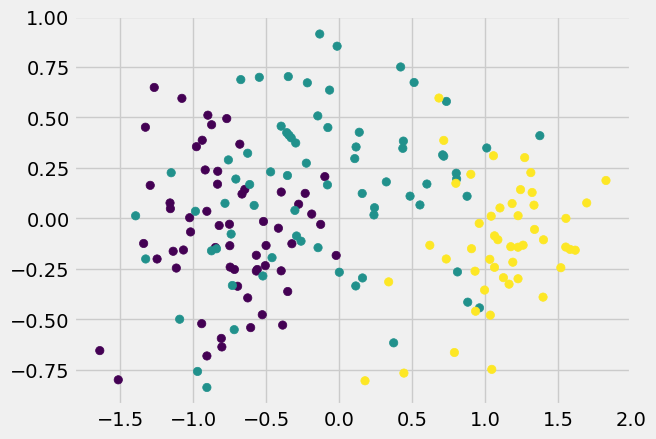

In [23]:
## transformed samples
plt.style.use('fivethirtyeight')
xs = transformed[:, 0]
ys = transformed[:, 1]
plt.scatter(xs, ys, c = wine.target)
plt.show()

### Correlations

In [27]:
# pearson correlation metric
from scipy.stats import pearsonr

In [28]:
correlation, p_Value = pearsonr(samples[:, 0], samples[:,1])

In [29]:
print (correlation, p_Value)

0.6999493647911862 1.59398003220218e-27


In [30]:
correlation2, p_Value_2 = pearsonr(transformed[:, 0], transformed[:,1])

In [31]:
print (correlation2, p_Value_2)

6.245004513516506e-16 0.9999999999999024


## Step 1 with the whole features

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(data)

PCA()

In [35]:
trans_data = pca.transform(data)

In [64]:
trans_data.shape

(178, 13)

In [41]:
pca.n_components_

13

In [53]:
pca.components_

array([[ 1.65926472e-03, -6.81015556e-04,  1.94905742e-04,
        -4.67130058e-03,  1.78680075e-02,  9.89829680e-04,
         1.56728830e-03, -1.23086662e-04,  6.00607792e-04,
         2.32714319e-03,  1.71380037e-04,  7.04931645e-04,
         9.99822937e-01],
       [ 1.20340617e-03,  2.15498184e-03,  4.59369254e-03,
         2.64503930e-02,  9.99344186e-01,  8.77962152e-04,
        -5.18507284e-05, -1.35447892e-03,  5.00440040e-03,
         1.51003530e-02, -7.62673115e-04, -3.49536431e-03,
        -1.77738095e-02],
       [-1.68738094e-02, -1.22003373e-01, -5.19874304e-02,
        -9.38593003e-01,  2.97802484e-02,  4.04846439e-02,
         8.54433387e-02, -1.35107797e-02,  2.46593824e-02,
        -2.91398464e-01,  2.59776624e-02,  7.03239693e-02,
        -4.52868159e-03],
       [-1.41446778e-01, -1.60389543e-01,  9.77280992e-03,
         3.30965260e-01,  5.39375605e-03,  7.45846556e-02,
         1.69086724e-01, -1.08055610e-02,  5.01209524e-02,
        -8.78893693e-01,  6.00349446e

In [51]:
pca.mean_

array([1.30006180e+01, 2.33634831e+00, 2.36651685e+00, 1.94949438e+01,
       9.97415730e+01, 2.29511236e+00, 2.02926966e+00, 3.61853933e-01,
       1.59089888e+00, 5.05808988e+00, 9.57449438e-01, 2.61168539e+00,
       7.46893258e+02])

In [38]:
pca.explained_variance_

array([9.92017895e+04, 1.72535266e+02, 9.43811370e+00, 4.99117861e+00,
       1.22884523e+00, 8.41063869e-01, 2.78973523e-01, 1.51381266e-01,
       1.12096765e-01, 7.17026032e-02, 3.75759789e-02, 2.10723661e-02,
       8.20370314e-03])

### Step 2: finding the intrinsic dimension

In [42]:
variance = pca.explained_variance_
features = np.arange(pca.n_components_)

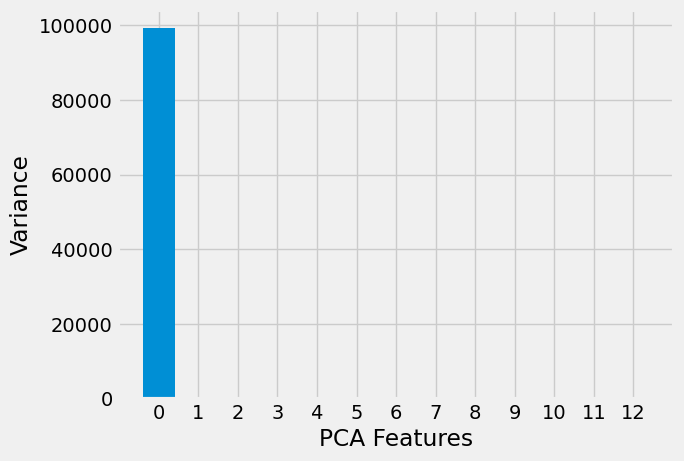

In [46]:

plt.bar(features, variance)
plt.xticks(features)
plt.xlabel('PCA Features')
plt.ylabel('Variance')
plt.show()

### intrinsic features = 1

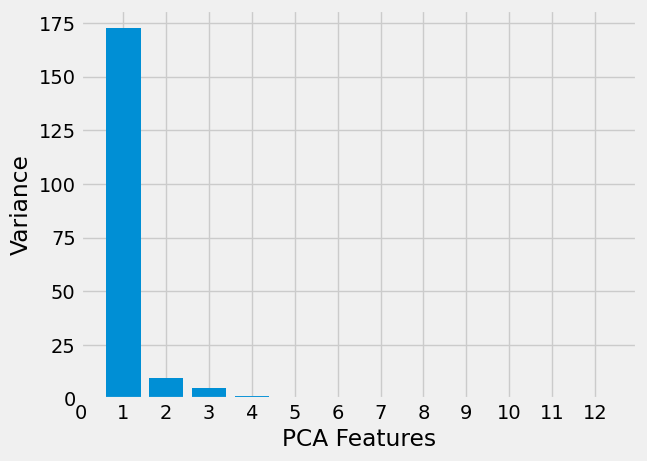

In [49]:
plt.bar(features[1:], variance[1:])
plt.xticks(features)
plt.xlabel('PCA Features')
plt.ylabel('Variance')
plt.show()

### intrinsic dimension = 2  or 4

In [56]:
data_pca = pca.components_[0:3]

In [63]:
data_pca.shape


(3, 13)

In [65]:
reduced_data = trans_data[:, 0:3]

In [66]:
reduced_data.shape

(178, 3)

## PCA with standard Scaler

In [67]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline

In [68]:
scaler = StandardScaler()
pca = PCA()
pipeline = make_pipeline(scaler, pca)

In [69]:
pipeline.fit(data)

Pipeline(steps=[('standardscaler', StandardScaler()), ('pca', PCA())])

In [71]:
trans_data = pipeline.transform(data)

In [72]:
trans_data.shape

(178, 13)

In [73]:
variance = pca.explained_variance_
features = np.arange(pca.n_components_)

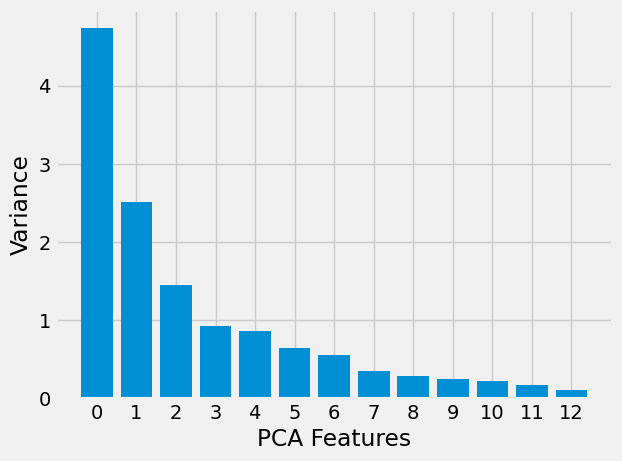

In [74]:

plt.bar(features, variance)
plt.xticks(features)
plt.xlabel('PCA Features')
plt.ylabel('Variance')
plt.show()

### intrinsic dimension = 3 or 5